## Title

[Generative Adversarial Nets
](https://papers.nips.cc/paper/2014/hash/5ca3e9b122f61f8f06494c97b1afccf3-Abstract.html)

---

## Authors and Year

Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio (2014)


---
## Why GAN

### 인실리코 메디슨의 성공사례

<figure class="half" align="center">
    <img src="./fig/FIH_Announce_FB.jpeg">
    <img src="./fig/174130_web.jpeg">
</figure>

인실리코 메디슨이라는 홍콩 스타트업에서 AI 이용하여 Fibrosis 약물후보를 빠르게 발굴한 사례가 있습니다. 전체 과정중 약물의 구조를 디자인하는 과정에서 **GAN과 RL을 혼합한 알고리즘**을 이용하여 좋은 성과를 얻었다고 합니다. 
해당 방법론을 증명하기 위해 in vitro 실험을 함께 진행하였습니다. 해당 이유 때문에 많은 사람들의 관심을 받았습니다. ( [참고1](https://pubs.acs.org/doi/full/10.1021/acs.molpharmaceut.8b00839), [참고2](https://www.nature.com/articles/s41587-019-0224-x) )

---
## How it works?

<p align="center">
  <img src="./fig/gen_struc.png" alt="factorio thumbnail"/>
</p> 

### 게임이론과 GAN
GAN을 **게임이론**으로 해석하면 **discriminator와 generator 간의 아래와 같이 mini-max game**이라 볼수 있습니다.

$$
\min_{G}\max_{D}V(G,D)=E_{x\sim{p_d}(x)}[lnD] + E_{z\sim{p_z}(x)}[ln(1-D(G(z)))]
\\
p_{d}: dist. \ of \ data , \ p_{z}: dist.  \ of \ gen ,  \\
D: discriminator, \ G: generator
$$

- discriminator는 generator를 간파하고
- generator는 discriminator를 속여야한다.
- 이 mini-max game을 **수식으로 표현**하면 아래와 같다.
    - discriminator는 **데이터의 확률 분포**를 모사하고,
    - generator는 **난수에서 데이터 분포로 가는 맵핑**을 만들어 낸다.


위의 **목적 함수**를 utility로 해석하면 모델이 모사하는 분포는 mixed strategy가 되고 조건을 만족하는 전략(모델)은 minmax strategy이고 zero-sum game에서 mini-max strategy는 ‘내쉬균형’입니다.([min-max theorem](https://en.wikipedia.org/wiki/Min-max_theorem)) 

⇒ **즉 Adversarial network의 optimum은 "내쉬균형"입니다.**

### GAN의 학습 방법

<p align="center">
  <img src="./fig/gen_update_model.png" alt="factorio thumbnail"/>
</p> 


하지만 **내쉬균형을 찾기는 매우 어렵습니다.** 몇가지 알고리즘이 존재하나 특정 상황에 어떤 것이 잘 동작할 지는 알수가 없습니다. 때문에 논문에서는 두 player의 전략(모델)을  **gradient-based 최적화**로 **동시에 업데이트** 하는 방법을 제안합니다. 해당 방법을 통해 근사적으로 optimum을 찾아낼 수 있습니다. 허나 해당 방식은 **이론적으로 수렴을 보장 하지는 않습니다.**(한쪽을 전략이 변하면 다른쪽의 전략이 best response가 아니게 될 수 있으므로 이론적으로 optimum을 보장받을 수 없습니다.)


### Jensen-Shannon divergence로 해석한 목적함수


<p align="center">
  <img src="./fig/kldiv_viz.gif" alt="factorio thumbnail"/>
</p> 

또한 목적함수를 분포간의 거리로도 해석가능합니다. 위의 목적함수 식에서 generator에 관한 변수를 고정하고 $D^{*}$를 대입하여 보면 식은 아래와 같이 정리됩니다.

$$
\begin{align*}
for \ fixed  \ G, \\ 
 \max_{D}V(G, D)

&=E_{x \sim p_d}[lnD^*(x)] + E_{z \sim p_z}[1-lnD^*(G(z))]\\

&=E_{x \sim p_d}[lnD^*(x)] + E_{x \sim p_g}[1-lnD^*(x)]\\

&= E_{x \sim{p_d}}[\ln{\frac{p_d(x)}{p_d(x)+p_g(x)}}] + E_{x \sim{p_g}}[\ln{\frac{p_g(x)}{p_d(x)+p_g(x)}}]
\\
&= D_{KL}(p_{d}||\frac{1}{2}(p_d+p_g)) + D_{KL}(p_{g}||\frac{1}{2}(p_d+p_g)) + C  
\end{align*}
$$

정리된 식은 $p_g$와  $p_d$간의 "**Jensen-Shannon divergence**"가 됩니다. 이러한 점이 maximum likelihood model과 adversarial model간의 차이를 만듭니다.

<p align="center">
  <img src="./fig/Difference-between-maximum-likelihood-and-adversarial-learning-The-red-lines-represent.png" alt="factorio thumbnail"/>
</p> 

maximum likelihood models이 $D_{KL}(p_d||p_g)$만을 고려하는 반면에 Jensen-Shannon divergence을 최적화 하는 adversarial model은 **$D_{KL}(p_d||p_g)$와 $D_{KL}(p_g||p_d)$를 모두 고려**하게 됩니다. 이것이 의미하는 바는 아래와 같습니다. 

$D_{KL}(p_d||p_g)$로 최적화 되는 경우는 G가 D의 모든 mode를 cover하려는 방향으로 학습됩니다. 

⇒ 즉 데이터의 모든 샘플을 만들어 낼 수 있지만 쌩뚱 맞은 샘플을 만들기도 하게 됩니다.(이 부분이 maximum likelihood models의 약점입니다.)

반면에 $D_{KL}(p_g||p_d)$를 최적화 하는 경우 G는 D의 가장 큰 mode를 찾는 방향으로 학습됩니다. 

⇒ 즉 소수의 데이터 특징은 무시하고 가장 빈도가 높은 특징들을 추려서 학습하게 됩니다. 때문에 minor한 특징을 놓치게 됩니다.

즉 두 가지를 모두 고려한다는 것은 두 지표의 장점 사이의 적절한 균형을 찾는 다고 볼 수 있습니다. 이러한 경향은 아래의 그림으로 설명이 됩니다. 좌측의 그림이 원본 데이터의 mode를 최대한 커버하는 방향으로 적합된 반면, 우측의 그림은 가장 큰 mode에 집중하여 적합된 것을 알 수 있습니다.

<p align="center">
  <img src="./fig/js_by_factor.png" alt="factorio thumbnail"/>
</p> 


최종적으로 위에 언급된 식을 실제 최적화 하기위한 알고리즘은 아래와 같습니다. 아래의 알고리즘에서 discriminator는 $\frac{1}{m}\sum_{i=1}^{m}[logD(x^i)+log(1-D(G(z^i)))] $을 maximize하고 generator는 
$\frac{1}{m}\sum_{i=1}^{m}log(1-D(G(z^i)))$를 minimize하며 학습됩니다.

<p align="center">
  <img src="./fig/gan_algo.png" alt="factorio thumbnail"/>
</p> 

---

## 마치며...

GAN이 학습하는 방식에는 아래와 같은 문제점이 존재합니다.

- 첫째로 non-cooperation game에서 내쉬 균형을 찾는 것이 매우 어렵다는 점입니다.
  - 만약 Discriminator가 빠르게 학습된다면 generator가 받는 gradient값이 작아질 테고
  - 만약 Discriminator가 너무 느리게 학습된다면 generator가 의미있는 gradient를 받을 수 없습니다.
- 다른 문제로는 mode collapse 문제와 catastrophic forgetting이 있다. 


<figure class="half" align="center">
    <img src="./fig/Sample-of-100-Generated-Images-of-a-Handwritten-Number-8-at-Epoch-315-from-a-GAN-that-has-Suffered-Mode-Collapse.png">
    <img src="./fig/Line-Plots-of-Loss-and-Accuracy-for-a-Generative-Adversarial-Network-with-a-Convergence-Failure.png">
</figure>

이후의 후속 연구들은 이러한 gan의 단점을 극복함과 더불어 원하는 방향으로 생성을 유도 할 수 있는 condition mechanism을 도입하기도 합니다.


---

## 참고

Bond-Taylor, S., Leach, A., Long, Y., & Willcocks, C. G. (2021). Deep Generative Modelling: A Comparative Review of VAEs, GANs, Normalizing Flows, Energy-Based and Autoregressive Models. IEEE Transactions on Pattern Analysis and Machine Intelligence, 1–20. https://doi.org/10.1109/TPAMI.2021.3116668

Salimans, T., Goodfellow, I., Zaremba, W., Cheung, V., Radford, A., & Chen, X. (2016). Improved techniques for training GANs. Advances in Neural Information Processing Systems, 2234–2242.

Huszár, F. (2015). How (not) to Train your Generative Model: Scheduled Sampling, Likelihood, Adversary? 1–9. http://arxiv.org/abs/1511.05101

## 예제

아래 링크 참조하여 작성
    - https://keras.io/examples/generative/wgan-graphs/

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from sklearn.manifold import TSNE
from rdkit.Chem.Descriptors import MolWt

### qm9 data

In [3]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


In [4]:
qm_9 = pd.read_csv("/data2/tyler_dev/working_dir/gan/qm9.csv")

### smiles to graph

In [5]:
atom_mapping = {
    "C": 0,
    0: "C",
    "N": 1,
    1: "N",
    "O": 2,
    2: "O",
    "F": 3,
    3: "F",
}

bond_mapping = {
    "SINGLE": 0,
    0: Chem.BondType.SINGLE,
    "DOUBLE": 1,
    1: Chem.BondType.DOUBLE,
    "TRIPLE": 2,
    2: Chem.BondType.TRIPLE,
    "AROMATIC": 3,
    3: Chem.BondType.AROMATIC,
}

NUM_ATOMS = 9  # Maximum number of atoms
ATOM_DIM = 4 + 1  # Number of atom types
BOND_DIM = 4 + 1  # Number of bond types
LATENT_DIM = 64  # Size of the latent space


def smiles_to_graph(smiles):
    # Converts SMILES to molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Initialize adjacency and feature tensor
    adjacency = np.zeros((BOND_DIM, NUM_ATOMS, NUM_ATOMS), "float32")
    features = np.zeros((NUM_ATOMS, ATOM_DIM), "float32")

    # loop over each atom in molecule
    for atom in molecule.GetAtoms():
        i = atom.GetIdx()
        atom_type = atom_mapping[atom.GetSymbol()]
        features[i] = np.eye(ATOM_DIM)[atom_type]
        # loop over one-hop neighbors
        for neighbor in atom.GetNeighbors():
            j = neighbor.GetIdx()
            bond = molecule.GetBondBetweenAtoms(i, j)
            bond_type_idx = bond_mapping[bond.GetBondType().name]
            adjacency[bond_type_idx, [i, j], [j, i]] = 1

    # Where no bond, add 1 to last channel (indicating "non-bond")
    # Notice: channels-first
    adjacency[-1, np.sum(adjacency, axis=0) == 0] = 1

    # Where no atom, add 1 to last column (indicating "non-atom")
    features[np.where(np.sum(features, axis=1) == 0)[0], -1] = 1

    return adjacency, features


def graph_to_molecule(graph):
    # Unpack graph
    adjacency, features = graph

    # RWMol is a molecule object intended to be edited
    molecule = Chem.RWMol()

    # Remove "no atoms" & atoms with no bonds
    keep_idx = np.where(
        (np.argmax(features, axis=1) != ATOM_DIM - 1) & (np.sum(adjacency[:-1], axis=(0, 1)) != 0)
    )[0]
    features = features[keep_idx]
    adjacency = adjacency[:, keep_idx, :][:, :, keep_idx]

    # Add atoms to molecule
    for atom_type_idx in np.argmax(features, axis=1):
        atom = Chem.Atom(atom_mapping[atom_type_idx])
        _ = molecule.AddAtom(atom)

    # Add bonds between atoms in molecule; based on the upper triangles
    # of the [symmetric] adjacency tensor
    (bonds_ij, atoms_i, atoms_j) = np.where(np.triu(adjacency) == 1)
    for (bond_ij, atom_i, atom_j) in zip(bonds_ij, atoms_i, atoms_j):
        if atom_i == atom_j or bond_ij == BOND_DIM - 1:
            continue
        bond_type = bond_mapping[bond_ij]
        molecule.AddBond(int(atom_i), int(atom_j), bond_type)

    # Sanitize the molecule; for more information on sanitization, see
    # https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    # Let's be strict. If sanitization fails, return None
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        return None

    return molecule


class SmilesDataSet(Dataset):
    def __init__(self, df) -> None:
        super().__init__()
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index: int):
        #label_ = self.df["HIV_active"].values[index]
        return smiles_to_graph(self.df["smiles"].values[index])


### model

In [6]:
class Generator(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.dense = nn.Sequential(
            nn.Linear(64, 128), 
            nn.Tanh(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Dropout(0.2),
            nn.Linear(256, 512),
            nn.Tanh(),
            nn.Dropout(0.2),
        )

        self.adjacency_nn =nn.Linear(512, 405) # 5x9x9 
        self.feature_nn =nn.Linear(512, 45) # 5x9 
        
    def forward(self, z):
        x = self.dense(z)
        
        x_adjacency = self.adjacency_nn(x)
        x_adjacency = x_adjacency.reshape((-1, 5, 9, 9))
        x_adjacency = (x_adjacency + x_adjacency.transpose(3, 2)) / 2
        x_adjacency = F.softmax(x_adjacency, dim=1)

        x_features = self.feature_nn(x)
        x_features = x_features.reshape((-1, 9, 5))
        x_features = F.softmax(x_features, dim=2)
        
        return x_adjacency, x_features


class RelationalGraphConv(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.kernel = nn.Parameter(torch.zeros((5, in_dim, out_dim),
         dtype=torch.float32, device='cuda:0'), True)
        nn.init.xavier_uniform_(self.kernel)

    def forward(self, adjacency, features):
        # Bx5x9x9, Bx9x5
        # B x 5 x 9 x 5 
        x = torch.matmul(adjacency, features[: , None, :, :])
        # B x 5 x 9 x 128
        x = torch.matmul(x, self.kernel)
        # B x 9 x 128
        x = x.sum(dim=1)
        return F.relu(x)
    
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.rconv = [RelationalGraphConv(in_dim, out_dim) for in_dim, out_dim in (
            (5, 128), (128, 128), (128, 128), (128, 128))]
        self.dense = nn.Sequential(
            nn.Linear(128, 512), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 1),
        )
    def forward(self, adjacency, features):
        for conv in self.rconv:
            features = conv(adjacency, features)
        # B x 128
        x = features.mean(dim=1)
        return self.dense(x)


In [206]:
class GAN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.generator = Generator()
        self.discriminator = Discriminator()

       
    def _gradient_penalty(self, graph_real, graph_generated, device):
        # Unpack graphs
        adjacency_real, features_real = graph_real
        adjacency_generated, features_generated = graph_generated

        # Generate interpolated graphs (adjacency_interp and features_interp)
        alpha = torch.rand((self.batch_size, 1, 1, 1)).mean()
        adjacency_interp = (adjacency_real * alpha) + (1 - alpha) * adjacency_generated
        alpha = alpha.squeeze(-1)
        features_interp = (features_real * alpha) + (1 - alpha) * features_generated

        # Compute the logits of interpolated graphs
        logits = self.discriminator(adjacency_interp, features_interp)
        return self._calculate_gradient(logits, adjacency_interp, device) + self._calculate_gradient(logits, features_interp, device)


    def _calculate_gradient(self, y, x, device):
        """Compute gradient penalty: (L2_norm(dy/dx) - 1)**2."""
        weight = torch.ones(y.size()).to(device)
        dydx = torch.autograd.grad(outputs=y,
                                   inputs=x,
                                   grad_outputs=weight,
                                   retain_graph=True,
                                   create_graph=True,
                                   only_inputs=True)[0]

        dydx = dydx.view(dydx.size(0), -1)
        dydx_l2norm = torch.sqrt(torch.sum(dydx**2, dim=1))
        return torch.mean((dydx_l2norm-1)**2)


    def train(self, df, n_epoch, batch_size, device="cuda:0"):
        self.batch_size = batch_size
        
        self.dataset = SmilesDataSet(df)
        self.dataloader = DataLoader(
            self.dataset, batch_size=self.batch_size, shuffle=True, drop_last=True
        )

        d_opti = torch.optim.Adam(self.discriminator.parameters(), lr=5e-4)
        g_opti = torch.optim.Adam(self.generator.parameters(), lr=5e-4)

        for epoch in range(n_epoch):
            for i, (adjacency, features) in tqdm(enumerate(self.dataloader)):
                # Bx5x9x9, Bx9x5
                adjacency = adjacency.to(device)
                features = features.to(device)
                
                real_prob = self.discriminator(adjacency, features)
                
                z = torch.normal(0, 1, (self.batch_size, 64)).to(device)
                adjacency_fake, features_fake = self.generator(z)
                fake_prob = self.discriminator(adjacency_fake, features_fake)
                gp_weight = self._gradient_penalty([adjacency, features], [adjacency_fake, features_fake], device)
                d_loss =  fake_prob.mean() - real_prob.mean() + 10*gp_weight

                d_opti.zero_grad()
                g_opti.zero_grad()
                d_loss.backward()
                d_opti.step()

                z = torch.normal(0, 1, (self.batch_size, 64)).to(device)
                adjacency_fake, features_fake = self.generator(z)
                fake_prob = self.discriminator(adjacency_fake, features_fake)
                g_loss = -fake_prob.mean()

                d_opti.zero_grad()
                g_opti.zero_grad()
                g_loss.backward()
                g_opti.step()

            print(
                f"epoch: {epoch}, d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, gp: {10*gp_weight.item():.4f}, D(x): {real_prob.mean().item():.4f}, D(G(x)): {fake_prob.mean().item():.4f},"
            )



### train

In [207]:
model = GAN()
model.to("cuda:0")

GAN(
  (generator): Generator(
    (dense): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): Tanh()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=128, out_features=256, bias=True)
      (4): Tanh()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=256, out_features=512, bias=True)
      (7): Tanh()
      (8): Dropout(p=0.2, inplace=False)
    )
    (adjacency_nn): Linear(in_features=512, out_features=405, bias=True)
    (feature_nn): Linear(in_features=512, out_features=45, bias=True)
  )
  (discriminator): Discriminator(
    (dense): Sequential(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=512, out_features=512, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=512, out_features=1, bias=True)
    )
  )
)

In [208]:
model.train(qm_9.iloc[::10], 30, 16, "cuda:0")

836it [00:35, 23.48it/s]


epoch: 0, d_loss: -1.2652, g_loss: 6.9145, gp: 0.5518, D(x): -5.1724, D(G(x)): -6.9145,


836it [00:35, 23.75it/s]


epoch: 1, d_loss: -2.9627, g_loss: 10.3361, gp: 2.8171, D(x): -4.2300, D(G(x)): -10.3361,


836it [00:37, 22.09it/s]


epoch: 2, d_loss: -4.3298, g_loss: 10.8963, gp: 0.9958, D(x): -5.8630, D(G(x)): -10.8963,


836it [00:37, 22.13it/s]


epoch: 3, d_loss: 0.4155, g_loss: 1.2785, gp: 0.5780, D(x): -1.2181, D(G(x)): -1.2785,


836it [00:37, 22.15it/s]


epoch: 4, d_loss: 0.2414, g_loss: -1.3991, gp: 0.2028, D(x): 1.4180, D(G(x)): 1.3991,


836it [00:37, 22.11it/s]


epoch: 5, d_loss: -0.1266, g_loss: -1.8355, gp: 0.3143, D(x): 2.1378, D(G(x)): 1.8355,


836it [00:37, 22.13it/s]


epoch: 6, d_loss: 0.5396, g_loss: -1.5971, gp: 0.5636, D(x): 1.5598, D(G(x)): 1.5971,


836it [00:37, 22.08it/s]


epoch: 7, d_loss: 0.1484, g_loss: -1.8128, gp: 0.5141, D(x): 1.5854, D(G(x)): 1.8128,


836it [00:37, 22.08it/s]


epoch: 8, d_loss: -0.3932, g_loss: -0.5452, gp: 0.3963, D(x): 1.3637, D(G(x)): 0.5452,


836it [00:37, 22.09it/s]


epoch: 9, d_loss: 0.2699, g_loss: 1.3411, gp: 0.2514, D(x): -1.1574, D(G(x)): -1.3411,


836it [00:37, 22.13it/s]


epoch: 10, d_loss: -0.2361, g_loss: 0.7029, gp: 0.3041, D(x): -0.2111, D(G(x)): -0.7029,


836it [00:37, 22.07it/s]


epoch: 11, d_loss: 0.2406, g_loss: 0.4887, gp: 0.3204, D(x): -0.3230, D(G(x)): -0.4887,


836it [00:37, 22.07it/s]


epoch: 12, d_loss: 0.4903, g_loss: 0.2661, gp: 0.3149, D(x): -0.2765, D(G(x)): -0.2661,


836it [00:37, 22.07it/s]


epoch: 13, d_loss: 0.0600, g_loss: -0.6903, gp: 0.1024, D(x): 0.5858, D(G(x)): 0.6903,


836it [00:38, 21.87it/s]


epoch: 14, d_loss: -0.1634, g_loss: -1.1382, gp: 0.1471, D(x): 1.3038, D(G(x)): 1.1382,


836it [00:37, 22.15it/s]


epoch: 15, d_loss: -0.4440, g_loss: -0.1469, gp: 0.0652, D(x): 0.5073, D(G(x)): 0.1469,


836it [00:37, 22.14it/s]


epoch: 16, d_loss: -0.0546, g_loss: 0.1483, gp: 0.1929, D(x): -0.0965, D(G(x)): -0.1483,


836it [00:37, 22.09it/s]


epoch: 17, d_loss: -0.1321, g_loss: 0.8176, gp: 0.2343, D(x): -0.8215, D(G(x)): -0.8176,


836it [00:39, 21.37it/s]


epoch: 18, d_loss: -0.4146, g_loss: 0.5354, gp: 0.1731, D(x): -0.1565, D(G(x)): -0.5354,


836it [00:38, 22.00it/s]


epoch: 19, d_loss: -0.0567, g_loss: 1.0701, gp: 0.2787, D(x): -0.8941, D(G(x)): -1.0701,


836it [00:37, 22.06it/s]


epoch: 20, d_loss: 0.2540, g_loss: 1.3670, gp: 0.2907, D(x): -1.3413, D(G(x)): -1.3670,


836it [00:37, 22.11it/s]


epoch: 21, d_loss: -0.3709, g_loss: 1.6800, gp: 0.3068, D(x): -0.7944, D(G(x)): -1.6800,


836it [00:37, 22.04it/s]


epoch: 22, d_loss: 0.7583, g_loss: 1.0217, gp: 0.2936, D(x): -1.1843, D(G(x)): -1.0217,


836it [00:37, 22.02it/s]


epoch: 23, d_loss: -0.4589, g_loss: 0.8649, gp: 0.1166, D(x): -0.4248, D(G(x)): -0.8649,


836it [00:37, 22.09it/s]


epoch: 24, d_loss: 0.0547, g_loss: 1.2542, gp: 0.1288, D(x): -1.1647, D(G(x)): -1.2542,


836it [00:38, 21.86it/s]


epoch: 25, d_loss: -0.1056, g_loss: 1.0812, gp: 0.2874, D(x): -0.7412, D(G(x)): -1.0812,


836it [00:34, 24.53it/s]


epoch: 26, d_loss: -0.2144, g_loss: 1.1555, gp: 0.1616, D(x): -0.5769, D(G(x)): -1.1555,


836it [00:32, 25.48it/s]


epoch: 27, d_loss: -0.4108, g_loss: 2.3012, gp: 0.1609, D(x): -1.5767, D(G(x)): -2.3012,


836it [00:32, 25.55it/s]


epoch: 28, d_loss: -0.0517, g_loss: 1.3834, gp: 0.2027, D(x): -0.9861, D(G(x)): -1.3834,


836it [00:32, 25.51it/s]


epoch: 29, d_loss: 0.0902, g_loss: 1.1720, gp: 0.1247, D(x): -1.1764, D(G(x)): -1.1720,


### validation

In [320]:
def sample(generator, batch_size):
    with torch.no_grad():
        z = torch.normal(0, 1, (batch_size, 64)).to("cuda:0")
        generator.eval()
        graph = generator(z)
        # obtain one-hot encoded adjacency tensor
        adjacency = torch.argmax(graph[0], dim=1)
        adjacency = F.one_hot(adjacency, num_classes=BOND_DIM)
        adjacency = adjacency.permute((0, 3, 1, 2))
        # Remove potential self-loops from adjacency
        torch.diag_embed(adjacency, dim1=-2, dim2=-1)
        # obtain one-hot encoded feature tensor
        features = torch.argmax(graph[1], dim=2)
        features = F.one_hot(features, num_classes=ATOM_DIM)
        
        return [
            graph_to_molecule([adjacency[i].cpu().numpy(), features[i].cpu().numpy()])
            for i in range(batch_size)
        ]


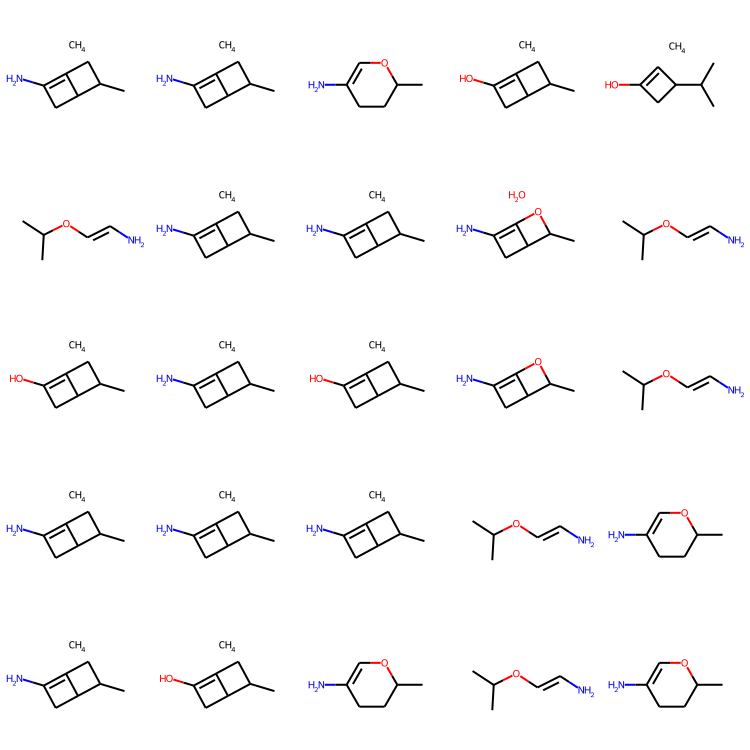

In [322]:
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit import RDLogger
import warnings

warnings.simplefilter("ignore", UserWarning)
RDLogger.DisableLog("rdApp.*")
model.generator.eval()
molecules = sample(model.generator, batch_size=100)
MolsToGridImage(
    [m for m in molecules if m is not None][:25], molsPerRow=5, subImgSize=(150, 150)
)

In [210]:
qm_9_samples = qm_9.iloc[::10]
qm_9_samples['mol'] = qm_9_samples["smiles"].apply(lambda x: Chem.MolFromSmiles(x))
qm_9_samples["FP"] = qm_9_samples["mol"].apply(lambda x: covert_to_FP(x))
X = np.concatenate(qm_9_samples["FP"].values).reshape(len(qm_9_samples["FP"]), -1)

molecules = []
for i in range(50):
    molecules += sample(model.generator, batch_size=100)
molecules_valid = [m for m in molecules if m is not None]
gen_fp = [covert_to_FP(x) for x in molecules_valid]
gen_fp = np.concatenate(gen_fp).reshape(len(gen_fp), -1)

/data2/tyler_dev/anaconda3/envs/tyler/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data2/tyler_dev/anaconda3/envs/tyler/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
sne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded = sne.fit_transform(np.concatenate([X, gen_fp]))

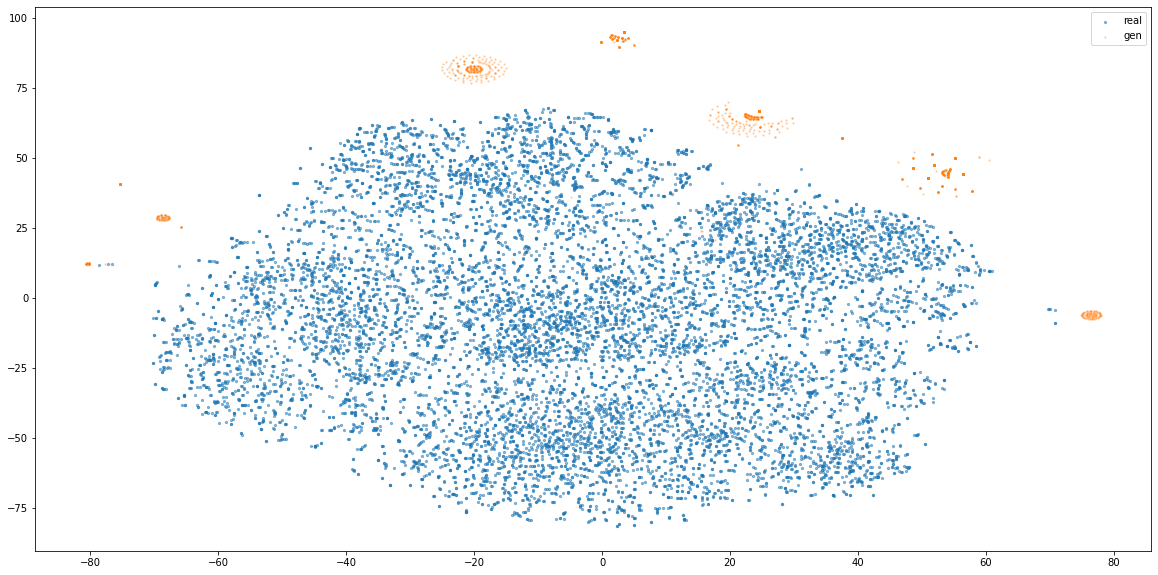

In [212]:
plt.figure(figsize=(20, 10))
plt.scatter(X_embedded[:len(X), 0], X_embedded[:len(X), 1], s=5, alpha=0.5)
plt.scatter(X_embedded[len(X):, 0], X_embedded[len(X):, 1], s=2, alpha=0.25)
plt.legend(["real", "gen"])
plt.show()